# Heat Equation
## The Differential Equation
$$  \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
## Initial Condition
$$ u(x,0)=2x, \ \ 0 \leq x \leq \frac{1}{2} $$
$$ u(x,0)=2(1-x), \ \ \frac{1}{2}  \leq x \leq 1 $$

## Boundary Condition
$$ u(0,t)=0,  u(1,t)=0 $$

## The Implicit Backward Time Centered Space (BTCS) Difference Equation
$$ w[i,j+1] = w[i,j] + \frac{k}{h^2}(w[i+1,j+1]-2w[i,j+1]+w[i-1,j+1])$$
$$ -rw[i-1,j+1]+(1+2r)w[i,j+1]-rw[i+1,j+1]=w[i,j]$$

where $r=\frac{k}{h^2}$


In [2]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


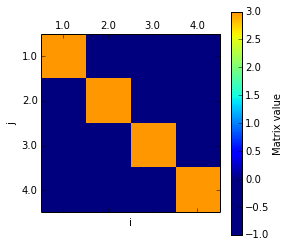

[ 0.    0.32  0.56  0.56  0.32  0.  ]
[[ 3. -1.  0.  0.]
 [-1.  3. -1.  0.]
 [ 0. -1.  3. -1.]
 [ 0.  0. -1.  3.]]
[ 0.    0.24  0.4   0.4   0.24  0.  ]
[ 0.     0.176  0.288  0.288  0.176  0.   ]
[ 0.     0.128  0.208  0.208  0.128  0.   ]
[ 0.      0.0928  0.1504  0.1504  0.0928  0.    ]


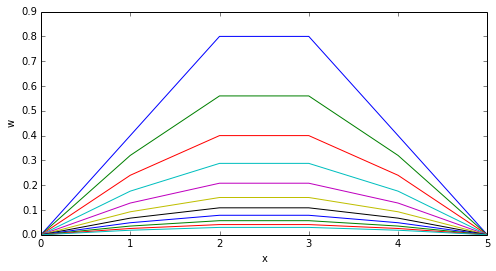

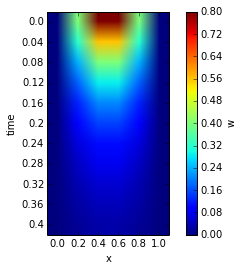

In [13]:
N=5
Nt=25
h=1/N
ht=1/Nt

time_iteration=10
time=np.arange(0,(time_iteration+.5)*ht,ht)

x=np.arange(0,1.0001,h)

w=np.zeros((N+1,time_iteration+1))
r=ht/(h*h)
A=np.zeros((N-1,N-1))
c=np.zeros(N-1)
b=np.zeros(N-1)
b[0]=0

# Initial Condition
for i in range (1,N):
    #w[0,i]=1-x[i]-1/np.pi*np.sin(2*np.pi*x[i])
    w[i,0]=2*x[i]
    if x[i]>0.5:
        w[i,0]=2*(1-x[i])
    

# Boundary Condition
for k in range (0,time_iteration):
    #w[k,0]=1
    w[0,k]=0
    w[N,k]=0


for i in range (0,N-1):
    A[i,i]=1+2*r

for i in range (0,N-2):           
    A[i+1,i]=-r
    A[i,i+1]=-r
    

fig = plt.figure(figsize=(8,4))
plt.matshow(A)
plt.xlabel('i')
plt.ylabel('j')
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
clb.set_clim((0,4))


plt.show()

Ainv=np.linalg.inv(A)


for k in range (1,time_iteration+1):
    w[1:(N),k]=np.dot(Ainv,w[1:(N),k-1])
    


print(w[:,1])
print(A)
print(w[:,2])
print(w[:,3])
print(w[:,4])
print(w[:,5])

fig = plt.figure(figsize=(8,4))
plt.plot(w)
plt.xlabel('x')
plt.ylabel('w')

fig = plt.figure()
plt.imshow(w.transpose())
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(time)), time)
plt.xlabel('x')
plt.ylabel('time')
clb=plt.colorbar()
clb.set_label('w')

plt.show()